In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as mt
from scipy import stats as st

In [2]:
df_calls=pd.read_csv('/datasets/calls.csv')
df_internet=pd.read_csv('/datasets/internet.csv')
df_messages=pd.read_csv('/datasets/messages.csv')
df_tariffs=pd.read_csv('/datasets/tariffs.csv')
df_users=pd.read_csv('/datasets/users.csv')

# <font style="background-color: lightblue; color=black">Обработка данных</font> #

In [3]:
display(df_calls.head(10))

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [4]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Известно, что "Мегалайн" округляет даже минимальное значение длительности звонка до минуты в большую сторону. Поэтому необходимо *данные в столбце Duration* привести к значению в **большую сторону**.

In [5]:
def calls_round(df, column):
    df[column] = df[column].apply(mt.ceil)
    df[column].astype(int)

In [6]:
calls_round(df_calls, 'duration')

In [7]:
df_calls.head(5)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


In [8]:
df_internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [9]:
df_internet=df_internet.drop(['Unnamed: 0'], axis=1)

In [10]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


In [11]:
display(df_messages.head(10))

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [12]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [13]:
display(df_tariffs)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Для удобства отображения в дальнейшем, переведем данные об интернете в Гб. 
Для этого введем переменную mb

In [14]:
mb = 1024

In [15]:
df_tariffs['mb_per_month_included']=df_tariffs['mb_per_month_included'] / mb

In [16]:
display(df_tariffs)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15.0,500,550,200,3,3,smart
1,1000,30.0,3000,1950,150,1,1,ultra


In [17]:
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null float64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: float64(1), int64(6), object(1)
memory usage: 256.0+ bytes


In [18]:
display(df_users.head(10))

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [19]:
df_users['name'] = df_users['first_name'].str.cat(df_users['last_name'], sep =" ")

/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [20]:
df_users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,name
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,Рафаил Верещагин
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,Иван Ежов
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,Евгений Абрамович
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,Белла Белякова
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,Татьяна Авдеенко
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,Афанасий Горлов
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart,Леонид Ермолаев
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart,Юна Березина
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart,Рустэм Пономарёв
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart,Василиса Блинова


In [21]:
df_user = df_users.drop(['first_name', 'last_name'], axis = 1)

In [22]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
name          500 non-null object
dtypes: int64(2), object(5)
memory usage: 27.5+ KB


Очевидно, что во всех таблицах *даты* необходимо привести к соответствующему типу данных, так как везде указан **object**

In [23]:
def good_date(df, column):
    df[column] = pd.to_datetime(df[column], format='%Y-%m-%d')

In [24]:
good_date(df_calls, 'call_date')
good_date(df_internet, 'session_date')
good_date(df_user, 'reg_date')
good_date(df_user, 'churn_date')

In [25]:
df_calls.info()
df_internet.info()
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null int64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null ob

- Типы данных даты приведен к нормальному значению
- Количество данных во всех таблицах одинаковый, значит пропусков нет (за исключением информацию о пользователях, но нам известно, что где пропуск - пользователь продолжает пользоваться тарифом)

In [26]:
df_user=df_user.merge(df_calls, how='outer')

In [27]:
df_user=df_user.merge(df_internet, how='outer')

In [28]:
df_user=df_user.merge(df_messages, how='outer')

In [29]:
df_user.head(10)

,user_id,age,churn_date,city,reg_date,tariff,name,id,call_date,duration,mb_used,session_date,message_date
0,1000,52.0,NaT,Краснодар,2018-05-25,ultra,Рафаил Верещагин,1000_0,2018-07-25,0.0,112.95,2018-11-25,2018-06-27
1,1000,52.0,NaT,Краснодар,2018-05-25,ultra,Рафаил Верещагин,1000_1,2018-08-17,0.0,1052.81,2018-09-07,2018-10-08
2,1000,52.0,NaT,Краснодар,2018-05-25,ultra,Рафаил Верещагин,1000_2,2018-06-11,3.0,1197.26,2018-06-25,2018-08-04
3,1000,52.0,NaT,Краснодар,2018-05-25,ultra,Рафаил Верещагин,1000_3,2018-09-21,14.0,550.27,2018-08-22,2018-06-16
4,1000,52.0,NaT,Краснодар,2018-05-25,ultra,Рафаил Верещагин,1000_4,2018-12-15,6.0,302.56,2018-09-24,2018-12-05
5,1000,52.0,NaT,Краснодар,2018-05-25,ultra,Рафаил Верещагин,1000_5,2018-11-02,0.0,399.97,2018-10-02,2018-06-20
6,1000,52.0,NaT,Краснодар,2018-05-25,ultra,Рафаил Верещагин,1000_6,2018-10-18,0.0,540.08,2018-09-07,2018-11-19
7,1000,52.0,NaT,Краснодар,2018-05-25,ultra,Рафаил Верещагин,1000_7,2018-08-22,19.0,415.70,2018-07-11,2018-10-29
8,1000,52.0,NaT,Краснодар,2018-05-25,ultra,Рафаил Верещагин,1000_8,2018-09-15,19.0,505.40,2018-10-08,2018-06-25
9,1000,52.0,NaT,Краснодар,2018-05-25,ultra,Рафаил Верещагин,1000_9,2018-08-15,0.0,345.54,2018-09-03,2018-12-18


In [30]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237287 entries, 0 to 237286
Data columns (total 13 columns):
user_id         237287 non-null int64
age             202615 non-null float64
churn_date      9921 non-null datetime64[ns]
city            202615 non-null object
reg_date        202615 non-null datetime64[ns]
tariff          202615 non-null object
name            202615 non-null object
id              237279 non-null object
call_date       202607 non-null datetime64[ns]
duration        202607 non-null float64
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
message_date    123036 non-null object
dtypes: datetime64[ns](4), float64(3), int64(1), object(5)
memory usage: 25.3+ MB


In [31]:
df_user.describe()

,user_id,age,duration,mb_used
count,237287.000000,202615.000000,202607.000000,149396.000000
mean,1253.764720,47.397448,7.158198,370.192426
std,143.858307,16.466099,5.959173,278.300951
min,1000.000000,18.000000,0.000000,0.000000
25%,1127.000000,33.000000,2.000000,138.187500
50%,1257.000000,47.000000,6.000000,348.015000
75%,1378.000000,63.000000,11.000000,559.552500
max,1499.000000,75.000000,38.000000,1724.830000


Сейчас рассмотрим, что происходит с данными и пользователями по месяцам (звонки, сообщения, интернет)

Добавим 3 новых столбца с месяцами по звонкам, сообщениям и использованию интернета.

In [32]:
df_user['call_month']=pd.DatetimeIndex(df_user['call_date']).month
df_user['message_month']=pd.DatetimeIndex(df_user['message_date']).month
df_user['mb_month']=pd.DatetimeIndex(df_user['session_date']).month

In [33]:
display(df_user.head(5))

,user_id,age,churn_date,city,reg_date,tariff,name,id,call_date,duration,mb_used,session_date,message_date,call_month,message_month,mb_month
0,1000,52.0,NaT,Краснодар,2018-05-25,ultra,Рафаил Верещагин,1000_0,2018-07-25,0.0,112.95,2018-11-25,2018-06-27,7.0,6.0,11.0
1,1000,52.0,NaT,Краснодар,2018-05-25,ultra,Рафаил Верещагин,1000_1,2018-08-17,0.0,1052.81,2018-09-07,2018-10-08,8.0,10.0,9.0
2,1000,52.0,NaT,Краснодар,2018-05-25,ultra,Рафаил Верещагин,1000_2,2018-06-11,3.0,1197.26,2018-06-25,2018-08-04,6.0,8.0,6.0
3,1000,52.0,NaT,Краснодар,2018-05-25,ultra,Рафаил Верещагин,1000_3,2018-09-21,14.0,550.27,2018-08-22,2018-06-16,9.0,6.0,8.0
4,1000,52.0,NaT,Краснодар,2018-05-25,ultra,Рафаил Верещагин,1000_4,2018-12-15,6.0,302.56,2018-09-24,2018-12-05,12.0,12.0,9.0


**<font color='blue'>Звонки по месяцам</font>**

In [34]:
calls = pd.pivot_table(df_user,
                            index=['user_id', 'call_month'],
                            values=['duration'],
                            aggfunc=('sum', 'count')).reset_index()
calls.columns = ['user_id', 'month', 'call_total', 'duration_total']

In [35]:
calls.sort_values(by='call_total', ascending=False).head(10).reset_index(drop=True)

,user_id,month,call_total,duration_total
0,1467,12.0,244,1673.0
1,1377,3.0,203,1609.0
2,1216,12.0,198,1435.0
3,1222,10.0,196,1322.0
4,1196,12.0,189,1213.0
5,1341,8.0,188,1321.0
6,1377,12.0,185,1259.0
7,1377,7.0,185,1311.0
8,1222,12.0,184,1261.0
9,1060,12.0,184,1233.0


In [36]:
calls.sort_values(by='duration_total', ascending=False).head(10).reset_index(drop=True)

,user_id,month,call_total,duration_total
0,1467,12.0,244,1673.0
1,1377,3.0,203,1609.0
2,1216,12.0,198,1435.0
3,1196,6.0,176,1410.0
4,1377,10.0,178,1401.0
5,1474,12.0,156,1345.0
6,1168,10.0,176,1334.0
7,1222,10.0,196,1322.0
8,1341,8.0,188,1321.0
9,1377,7.0,185,1311.0


И по продолжительности звонков, и по длительности у нас один лидер с user_id **1467**. 
Примечательно, что по количеству звонков самый ударный месяц - декабрь. Здесь можно сделать вывод, что такой наплыв связан с тем, что наступают праздники, люди спешат поздравить друг друга.
В то же время, конец года - пора подводить итоги, закрывать дела. Следовательно, и звонков больше
В топ 10 по длительности декабрь занял первые 2 места в топ 3. Самый активный месяц

In [37]:
len(df_user[df_user['duration'] == 0]) / len(df_user)

0.16694129893335918

Нулевых звонков почти **17%**. Но я считаю, что не считать эти звонки невозможно. Они нужны в таблице как минимум для того, чтобы видеть активность пользователя. В современном мире нулевые звонки - это либо человек не может ответить на звонок (занят, забыл телефон, телефон разрядился, находится в другом городе и пр.), либо человек не хочет отвечать на звонок (реклама, нежелательный звонок, не любит разговаривать (предпочитает мессенджеры, которые сейчас замещают звонки очень активно)).
Но совсем уйти от звонков невозможно. А вот такие звонки (которых много) показывают, что активность высокая. И если кто-то не смог принять звонок первый раз, второй, то потом обязательно или перезвонит сам, или попросит позвонить. И тогда звонок точно состоится. И, соответственно, трафик будет использован.

**<font color='blue'>Сообщения по месяцам</font>**

In [38]:
message = pd.pivot_table(df_user,
                            index=['user_id', 'message_month'],
                            values=['id'],
                            aggfunc=('count')).reset_index()
message.columns = ['user_id', 'month', 'message_total']

In [39]:
message.sort_values(by='message_total', ascending=False).head(10).reset_index(drop=True)

,user_id,month,message_total
0,1165,12.0,224
1,1028,10.0,223
2,1231,7.0,211
3,1231,6.0,201
4,1165,11.0,197
5,1300,10.0,191
6,1231,12.0,191
7,1167,10.0,190
8,1231,9.0,188
9,1231,10.0,185


Легко заметить, что 5 позиций из 10 занял пользователь с номером **1231**. Очевидно, что он предпочитает сообщения мобильной свзи. 
Также видно, что уникальные пользователи сообщений в топе *отличаются* от уникальных пользователей в топе звонков. Это в очередной раз доказывает, что все зависит от предпочтений пользователя (сделать тариф с безлимитными СМС, но супердорогими звонками?).
И снова мы видим, что лидер по месяцу оказывается декабрь.

**<font color='blue'>Интернет по месяцам</font>**

У нас заявлены тарифы, равные 15 и 30 гб, включенных в тариф. Переведем эти данные в мегабайты

In [40]:
df_user['gb_used'] = df_user['mb_used'] / mb

In [41]:
df_user[df_user['mb_used'] == 0].count()

user_id          19598
age              17324
churn_date         796
city             17324
reg_date         17324
tariff           17324
name             17324
id               19598
call_date        17324
duration         17324
mb_used          19598
session_date     19598
message_date     10953
call_month       17324
message_month    10953
mb_month         19598
gb_used          19598
dtype: int64

Интернет-сессий с нулевм трафиком **19598** Узнаем, какое это количество от общего числа сессий

In [42]:
len(df_user[df_user['mb_used'] == 0]) / len(df_user)

0.0825919666901263

Таких сессий у нас получилось **8%**. Небольшое количество от общего числа. Это может быть связано с тем, что у пользователя стоит ограничитель использовать дополнительный пакет сверх трафика, либо сбой в соединении (пытался подключиться к интернету, но связь не ловила).

In [43]:
internet = pd.pivot_table(df_user,
                            index=['user_id', 'mb_month'],
                            values=['gb_used'],
                            aggfunc=('sum')).reset_index()
internet.columns = ['user_id', 'month', 'gb_total']

In [44]:
internet.sort_values(by='gb_total', ascending=False).head(10).reset_index(drop=True)

,user_id,month,gb_total
0,1124,10.0,48.579775
1,1240,8.0,47.218350
2,1255,7.0,44.121787
3,1300,11.0,43.258652
4,1060,12.0,42.901719
5,1240,5.0,42.797754
6,1180,10.0,42.553340
7,1240,12.0,42.309863
8,1380,12.0,42.289551
9,1024,11.0,42.097139


Можно заметить, что **id** топ пользователей интернетом отличается от других топов. И у этих топов очень большой объем использованного интернета (id **1240** встречается аж *3* раза). Это говорит отом, что они предпочитают интернет другим способам связи (позвонить сейчас можно и через интернет)

**<font color='red'>Вывод</font>**

Изучив данные показатели (звонки, сообщения, интернет) прослеживается четкая тенденция, что каждому пользователю в трафике нужно что-то одно из пакета услуг. 

# Выручка #

Теперь изучу прибыль, которую получает компания с каждого пользователя, соответсвенно.
Для этого мне потребуется выполнить несколько шагов:
- посчитать количество услуг, затраченное сверх доступного лимита по пакету услуг
- рассчитать стоимость этих услуг
- сложить общую стоимость пакета и услуг, сверх пакета

Для этого мне необходим датасет, который будет включать исключительно информацию по каждой услуге

In [45]:
df_profit=calls.merge(message, on=['user_id', 'month'], how='outer')
df_profit=df_profit.merge(internet, on=['user_id', 'month'], how='outer')

In [46]:
display(df_profit)

,user_id,month,call_total,duration_total,message_total,gb_total
0,1000,5.0,22.0,159.0,22.0,2.200674
1,1000,6.0,43.0,172.0,60.0,22.689229
2,1000,7.0,47.0,340.0,75.0,13.675430
3,1000,8.0,52.0,408.0,81.0,13.726494
4,1000,9.0,58.0,466.0,57.0,14.227451
...,...,...,...,...,...,...
3209,1489,9.0,NaN,NaN,32.0,16.803027
3210,1489,10.0,NaN,NaN,21.0,19.101016
3211,1489,11.0,NaN,NaN,20.0,17.081602
3212,1489,12.0,NaN,NaN,35.0,16.916514


У нас появилась итоговая таблица, по которой можно ситать выручку. 
здесь мы видим нулевые значения. Скорее всего, в этот месяц пользователь не использовал данную услугу. Заменим их **0**

In [47]:
df_profit=df_profit.fillna(0)

In [48]:
display(df_profit)

,user_id,month,call_total,duration_total,message_total,gb_total
0,1000,5.0,22.0,159.0,22.0,2.200674
1,1000,6.0,43.0,172.0,60.0,22.689229
2,1000,7.0,47.0,340.0,75.0,13.675430
3,1000,8.0,52.0,408.0,81.0,13.726494
4,1000,9.0,58.0,466.0,57.0,14.227451
...,...,...,...,...,...,...
3209,1489,9.0,0.0,0.0,32.0,16.803027
3210,1489,10.0,0.0,0.0,21.0,19.101016
3211,1489,11.0,0.0,0.0,20.0,17.081602
3212,1489,12.0,0.0,0.0,35.0,16.916514


Чтобы понять, какое количество услуг входит и не входит в границы тарифа, объединим с таблицей пользователей тарифом и удалим не интересующие нас значения

In [49]:
df_profit = df_profit.merge(df_users, on='user_id', how='outer')
df_profit.drop(['age', 'first_name', 'last_name', 'name', 'churn_date', 'reg_date'], axis='columns', inplace=True)
display(df_profit)

,user_id,month,call_total,duration_total,message_total,gb_total,city,tariff
0,1000,5.0,22.0,159.0,22.0,2.200674,Краснодар,ultra
1,1000,6.0,43.0,172.0,60.0,22.689229,Краснодар,ultra
2,1000,7.0,47.0,340.0,75.0,13.675430,Краснодар,ultra
3,1000,8.0,52.0,408.0,81.0,13.726494,Краснодар,ultra
4,1000,9.0,58.0,466.0,57.0,14.227451,Краснодар,ultra
...,...,...,...,...,...,...,...,...
3211,1489,10.0,0.0,0.0,21.0,19.101016,Санкт-Петербург,smart
3212,1489,11.0,0.0,0.0,20.0,17.081602,Санкт-Петербург,smart
3213,1489,12.0,0.0,0.0,35.0,16.916514,Санкт-Петербург,smart
3214,1128,NaN,NaN,NaN,NaN,NaN,Волжский,ultra


Можно заметить, что обнаружились пользователи, которые подключались к тарифу, но практически сразу отключались. Такие пользователи нам не подходят, соттветственно, мы их *удаляем*

In [50]:
df_profit.dropna(inplace = True)
display(df_profit)

,user_id,month,call_total,duration_total,message_total,gb_total,city,tariff
0,1000,5.0,22.0,159.0,22.0,2.200674,Краснодар,ultra
1,1000,6.0,43.0,172.0,60.0,22.689229,Краснодар,ultra
2,1000,7.0,47.0,340.0,75.0,13.675430,Краснодар,ultra
3,1000,8.0,52.0,408.0,81.0,13.726494,Краснодар,ultra
4,1000,9.0,58.0,466.0,57.0,14.227451,Краснодар,ultra
...,...,...,...,...,...,...,...,...
3209,1489,8.0,0.0,0.0,17.0,10.791562,Санкт-Петербург,smart
3210,1489,9.0,0.0,0.0,32.0,16.803027,Санкт-Петербург,smart
3211,1489,10.0,0.0,0.0,21.0,19.101016,Санкт-Петербург,smart
3212,1489,11.0,0.0,0.0,20.0,17.081602,Санкт-Петербург,smart


Сейчас я буду объединять таблицу, по которой буду считать прибыль (df_profit) с таблицей, в которой представлена информация о тарифах (df_tarrifs). 
Прежде, чем приступать к объединению, переименую столбец в датасете df_tarrifs с названием тарифа (tariff_name на tarriff), сделаю названия столбцов более читаемые, изменю название про мегабайты и гигабайты

In [51]:
df_tariffs.columns = ['messages_month', 'gb_month', 'minutes_month', 'rub_fee', 'rub_gb',
                   'rub_message', 'rub_minute', 'tariff']

In [52]:
df_profit=df_profit.merge(df_tariffs, on=['tariff'], how='outer')
display(df_profit)

,user_id,month,call_total,duration_total,message_total,gb_total,city,tariff,messages_month,gb_month,minutes_month,rub_fee,rub_gb,rub_message,rub_minute
0,1000,5.0,22.0,159.0,22.0,2.200674,Краснодар,ultra,1000,30.0,3000,1950,150,1,1
1,1000,6.0,43.0,172.0,60.0,22.689229,Краснодар,ultra,1000,30.0,3000,1950,150,1,1
2,1000,7.0,47.0,340.0,75.0,13.675430,Краснодар,ultra,1000,30.0,3000,1950,150,1,1
3,1000,8.0,52.0,408.0,81.0,13.726494,Краснодар,ultra,1000,30.0,3000,1950,150,1,1
4,1000,9.0,58.0,466.0,57.0,14.227451,Краснодар,ultra,1000,30.0,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8.0,0.0,0.0,17.0,10.791562,Санкт-Петербург,smart,50,15.0,500,550,200,3,3
3210,1489,9.0,0.0,0.0,32.0,16.803027,Санкт-Петербург,smart,50,15.0,500,550,200,3,3
3211,1489,10.0,0.0,0.0,21.0,19.101016,Санкт-Петербург,smart,50,15.0,500,550,200,3,3
3212,1489,11.0,0.0,0.0,20.0,17.081602,Санкт-Петербург,smart,50,15.0,500,550,200,3,3


Итоговая таблица, по которой можно производить расчеты

**<font color='blue'>Расчет услуг сверх пакета**

Как сказано в условии "вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану".
Соответственно, нас интересуют только значения, которые идут *сверх тарифного плана*.
Также известно, что оплачивается определенное количество услуг сверх пакета (например: 1 гб, даже если потратил 100 мб), а это значит, что все услуги сверхпакета необходимо округлить в **большую** сторону. Остальные значения, которые будут в данном случае *отрицательными*, мы приравняем к нулю.

In [53]:
def col(df, column_tot, column_month, column_new):
    df[column_new] = df[column_tot] - df[column_month]
    df[column_new] = df[column_new].apply(mt.ceil)

col(df_profit, 'duration_total', 'minutes_month', 'over_minutes')
col(df_profit, 'message_total', 'messages_month', 'over_messages')
col(df_profit, 'gb_total', 'gb_month', 'over_gb')

In [54]:
def neg(df, column):
    df.loc[df[column] < 0, column] = 0

neg(df_profit, 'over_minutes')
neg(df_profit, 'over_messages')
neg(df_profit, 'over_gb')
display(df_profit)

,user_id,month,call_total,duration_total,message_total,gb_total,city,tariff,messages_month,gb_month,minutes_month,rub_fee,rub_gb,rub_message,rub_minute,over_minutes,over_messages,over_gb
0,1000,5.0,22.0,159.0,22.0,2.200674,Краснодар,ultra,1000,30.0,3000,1950,150,1,1,0,0,0
1,1000,6.0,43.0,172.0,60.0,22.689229,Краснодар,ultra,1000,30.0,3000,1950,150,1,1,0,0,0
2,1000,7.0,47.0,340.0,75.0,13.675430,Краснодар,ultra,1000,30.0,3000,1950,150,1,1,0,0,0
3,1000,8.0,52.0,408.0,81.0,13.726494,Краснодар,ultra,1000,30.0,3000,1950,150,1,1,0,0,0
4,1000,9.0,58.0,466.0,57.0,14.227451,Краснодар,ultra,1000,30.0,3000,1950,150,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8.0,0.0,0.0,17.0,10.791562,Санкт-Петербург,smart,50,15.0,500,550,200,3,3,0,0,0
3210,1489,9.0,0.0,0.0,32.0,16.803027,Санкт-Петербург,smart,50,15.0,500,550,200,3,3,0,0,2
3211,1489,10.0,0.0,0.0,21.0,19.101016,Санкт-Петербург,smart,50,15.0,500,550,200,3,3,0,0,5
3212,1489,11.0,0.0,0.0,20.0,17.081602,Санкт-Петербург,smart,50,15.0,500,550,200,3,3,0,0,3


In [55]:
df_profit['over_profit'] = (df_profit['over_minutes'] * df_profit['rub_minute'] +
                               df_profit['over_messages'] * df_profit['rub_message'] +
                               df_profit['over_gb'] * df_profit['rub_gb'])
display(df_profit)

,user_id,month,call_total,duration_total,message_total,gb_total,city,tariff,messages_month,gb_month,minutes_month,rub_fee,rub_gb,rub_message,rub_minute,over_minutes,over_messages,over_gb,over_profit
0,1000,5.0,22.0,159.0,22.0,2.200674,Краснодар,ultra,1000,30.0,3000,1950,150,1,1,0,0,0,0
1,1000,6.0,43.0,172.0,60.0,22.689229,Краснодар,ultra,1000,30.0,3000,1950,150,1,1,0,0,0,0
2,1000,7.0,47.0,340.0,75.0,13.675430,Краснодар,ultra,1000,30.0,3000,1950,150,1,1,0,0,0,0
3,1000,8.0,52.0,408.0,81.0,13.726494,Краснодар,ultra,1000,30.0,3000,1950,150,1,1,0,0,0,0
4,1000,9.0,58.0,466.0,57.0,14.227451,Краснодар,ultra,1000,30.0,3000,1950,150,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8.0,0.0,0.0,17.0,10.791562,Санкт-Петербург,smart,50,15.0,500,550,200,3,3,0,0,0,0
3210,1489,9.0,0.0,0.0,32.0,16.803027,Санкт-Петербург,smart,50,15.0,500,550,200,3,3,0,0,2,400
3211,1489,10.0,0.0,0.0,21.0,19.101016,Санкт-Петербург,smart,50,15.0,500,550,200,3,3,0,0,5,1000
3212,1489,11.0,0.0,0.0,20.0,17.081602,Санкт-Петербург,smart,50,15.0,500,550,200,3,3,0,0,3,600


Получили таблицу, в которой указаны итоговые затраты по каждому пользователю за месяц.
Сейчас добавим столбец, в котором будет указана итоговая трата за месяц каждого абонента

In [56]:
df_profit['total_month']=(df_profit['rub_fee'] + df_profit['over_profit']).round(2)
display(df_profit)

,user_id,month,call_total,duration_total,message_total,gb_total,city,tariff,messages_month,gb_month,minutes_month,rub_fee,rub_gb,rub_message,rub_minute,over_minutes,over_messages,over_gb,over_profit,total_month
0,1000,5.0,22.0,159.0,22.0,2.200674,Краснодар,ultra,1000,30.0,3000,1950,150,1,1,0,0,0,0,1950
1,1000,6.0,43.0,172.0,60.0,22.689229,Краснодар,ultra,1000,30.0,3000,1950,150,1,1,0,0,0,0,1950
2,1000,7.0,47.0,340.0,75.0,13.675430,Краснодар,ultra,1000,30.0,3000,1950,150,1,1,0,0,0,0,1950
3,1000,8.0,52.0,408.0,81.0,13.726494,Краснодар,ultra,1000,30.0,3000,1950,150,1,1,0,0,0,0,1950
4,1000,9.0,58.0,466.0,57.0,14.227451,Краснодар,ultra,1000,30.0,3000,1950,150,1,1,0,0,0,0,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8.0,0.0,0.0,17.0,10.791562,Санкт-Петербург,smart,50,15.0,500,550,200,3,3,0,0,0,0,550
3210,1489,9.0,0.0,0.0,32.0,16.803027,Санкт-Петербург,smart,50,15.0,500,550,200,3,3,0,0,2,400,950
3211,1489,10.0,0.0,0.0,21.0,19.101016,Санкт-Петербург,smart,50,15.0,500,550,200,3,3,0,0,5,1000,1550
3212,1489,11.0,0.0,0.0,20.0,17.081602,Санкт-Петербург,smart,50,15.0,500,550,200,3,3,0,0,3,600,1150


In [57]:
profit=df_profit.pivot_table(index=['user_id', 'month'], values='total_month', aggfunc='sum').reset_index()
display(profit)

,user_id,month,total_month
0,1000,5.0,1950
1,1000,6.0,1950
2,1000,7.0,1950
3,1000,8.0,1950
4,1000,9.0,1950
...,...,...,...
3209,1498,10.0,1750
3210,1499,9.0,550
3211,1499,10.0,1150
3212,1499,11.0,1513


In [58]:
profit.sort_values(by='total_month', ascending=False).head(10).reset_index(drop=True)

,user_id,month,total_month
0,1486,12.0,6770
1,1042,12.0,5709
2,1486,11.0,5680
3,1261,12.0,5672
4,1286,12.0,5321
5,1159,12.0,5252
6,1098,12.0,5014
7,1124,10.0,4800
8,1261,11.0,4664
9,1240,8.0,4650


In [59]:
display(profit['total_month'].sum())

4914451

Выручка компании "Мегалайн" за 2018 год составила <font color='green'>4914451</font> рубль.

<font color='red'>Вывод</font>

Как уже было сказано выше, самый главный вывод, который можно сделать, подготовив данные - у каждого пользователя есть свое предпочтение по услугам (звонки, интернет, сообщения). 
Общая выручка компании за год составила чуть больше 4,9 млн рублей. 
Если посмотреть на последнюю таблицу, где показан топ по тратам за месяц, то подтверждается моя теория, выдвинутая выше, что самый затратный месяц - декабрь. Как я уже говорил ранее, на то может влиять несколько факторов. 
С точки зрения самих данных, при обработке мною не было найдено критических ошибок, которые бы влияли на изучение датасета. Главное, что было сделано, для удобства анализа - заменен тип данных на дату (потому что необходимо было вычленить месяц), числа обработаны где необходимо до целочисленных значений.

С помощью полученных данных можно переходить к их анализу 

# <font style="background-color: lightblue; color=black">Анализ данных</font> #

**<font color='blue'>Поведение клиентов оператора</font>**

Для анализа поведения клиентов возьмем данные из итоговой таблицы, которые требуются (уникальный id, месяц, количество звонков, количество сообщений, использованный интернет, город, тариф, итоговые затраты за месяц)

In [60]:
client_behavior = df_profit[['user_id', 'month', 'duration_total', 'message_total',
                             'gb_total', 'city', 'tariff', 'total_month']]
display(client_behavior.head(10))

,user_id,month,duration_total,message_total,gb_total,city,tariff,total_month
0,1000,5.0,159.0,22.0,2.200674,Краснодар,ultra,1950
1,1000,6.0,172.0,60.0,22.689229,Краснодар,ultra,1950
2,1000,7.0,340.0,75.0,13.675430,Краснодар,ultra,1950
3,1000,8.0,408.0,81.0,13.726494,Краснодар,ultra,1950
4,1000,9.0,466.0,57.0,14.227451,Краснодар,ultra,1950
5,1000,10.0,350.0,73.0,14.357900,Краснодар,ultra,1950
6,1000,11.0,338.0,58.0,14.410615,Краснодар,ultra,1950
7,1000,12.0,333.0,70.0,9.587510,Краснодар,ultra,1950
8,1003,8.0,380.0,37.0,8.364463,Москва,ultra,1950
9,1003,9.0,961.0,91.0,12.176631,Москва,ultra,1950


Рассмотрим отдельно для каждого тарифа

In [61]:
smart_behavior=client_behavior.loc[client_behavior['tariff'] == 'smart'].reset_index(drop=True)
smart_behavior

,user_id,month,duration_total,message_total,gb_total,city,tariff,total_month
0,1001,11.0,430.0,0.0,17.997402,Москва,smart,1150
1,1001,12.0,414.0,0.0,13.707676,Москва,smart,550
2,1002,6.0,117.0,4.0,10.602363,Стерлитамак,smart,550
3,1002,7.0,214.0,11.0,17.168066,Стерлитамак,smart,1150
4,1002,8.0,289.0,13.0,19.843027,Стерлитамак,smart,1550
...,...,...,...,...,...,...,...,...
2224,1489,8.0,0.0,17.0,10.791562,Санкт-Петербург,smart,550
2225,1489,9.0,0.0,32.0,16.803027,Санкт-Петербург,smart,950
2226,1489,10.0,0.0,21.0,19.101016,Санкт-Петербург,smart,1550
2227,1489,11.0,0.0,20.0,17.081602,Санкт-Петербург,smart,1150


In [62]:
smart_behavior.describe().round(2)

,user_id,month,duration_total,message_total,gb_total,total_month
count,2229.00,2229.00,2229.00,2229.00,2229.00,2229.00
mean,1246.51,8.35,417.93,33.38,15.83,1289.97
std,146.12,2.92,190.31,28.23,5.73,818.40
min,1001.00,1.00,0.00,0.00,0.00,550.00
25%,1121.00,6.00,282.00,10.00,12.35,550.00
50%,1239.00,9.00,422.00,28.00,16.12,1023.00
75%,1376.00,11.00,545.00,51.00,19.57,1750.00
max,1499.00,12.00,1435.00,143.00,37.65,6770.00


Ежемесячная длительность разговоров изменялась с января по декабрь в пределах от 0 до 1 435 минут (45-50 минут в день) с медианным значением 422 минуты (около 14 мин/день); количество используемого интернет-трафика колебалось от 0Гб до 38гб с медианным значением 17Гб (округляю до большего, так как сверхпакета (15гб) оплачено будет большее количество); количество отправленных сообщений - с 0 до 143 сообщений с медианным значением 28 сообщений.
Можно заметить, что среднее по всем данным очень близко к медианным (за исключением оплаты за месяц)

In [63]:
ultra_behavior=client_behavior.loc[client_behavior['tariff'] == 'ultra'].reset_index(drop=True)
ultra_behavior

,user_id,month,duration_total,message_total,gb_total,city,tariff,total_month
0,1000,5.0,159.0,22.0,2.200674,Краснодар,ultra,1950
1,1000,6.0,172.0,60.0,22.689229,Краснодар,ultra,1950
2,1000,7.0,340.0,75.0,13.675430,Краснодар,ultra,1950
3,1000,8.0,408.0,81.0,13.726494,Краснодар,ultra,1950
4,1000,9.0,466.0,57.0,14.227451,Краснодар,ultra,1950
...,...,...,...,...,...,...,...,...
980,1473,8.0,0.0,17.0,12.602930,Красноярск,ultra,1950
981,1473,9.0,0.0,19.0,16.884619,Красноярск,ultra,1950
982,1473,10.0,0.0,20.0,13.367822,Красноярск,ultra,1950
983,1473,11.0,0.0,14.0,21.165820,Красноярск,ultra,1950


In [64]:
ultra_behavior.describe().round(2)

,user_id,month,duration_total,message_total,gb_total,total_month
count,985.00,985.00,985.00,985.00,985.00,985.00
mean,1263.09,8.25,526.62,49.36,19.01,2070.15
std,140.69,2.87,317.61,47.80,9.85,376.19
min,1000.00,1.00,0.00,0.00,0.00,1950.00
25%,1143.00,6.00,284.00,6.00,11.49,1950.00
50%,1277.00,9.00,518.00,38.00,18.86,1950.00
75%,1381.00,11.00,752.00,79.00,26.21,1950.00
max,1495.00,12.00,1673.00,224.00,48.58,4800.00


Ежемесячная активность по тарифу Ультра: длительность разговоров с января по декабрь находилась в диапазоне от 0 минут до 1 673 минут (65-66 минут в день) с медианным значением 518 минут (около 17 минут в день); количество используемого интернет-трафика - от 0Гб до 49Гб с медианным значением 19Гб; количество отправленных сообщений - с 0 до 224 сообщений с медианным значением 38 сообщений.

In [65]:
smart_pivot = smart_behavior.pivot_table(index='month',
                                         values=['duration_total', 'message_total', 'gb_total', 'total_month'],
                                         aggfunc='mean').reset_index()
ultra_pivot = ultra_behavior.pivot_table(index='month',
                                         values=['duration_total', 'message_total', 'gb_total', 'total_month'],
                                         aggfunc='mean').reset_index()
display(smart_pivot.round(2))
display(ultra_pivot.round(2))

,month,duration_total,gb_total,message_total,total_month
0,1.0,203.85,8.31,18.24,721.32
1,2.0,298.69,11.33,24.09,827.60
2,3.0,390.05,14.75,31.86,1164.62
3,4.0,367.13,13.15,30.74,963.09
4,5.0,387.36,15.43,33.77,1197.51
5,6.0,395.64,15.42,33.40,1204.02
6,7.0,408.35,15.37,33.75,1223.95
7,8.0,421.47,16.22,33.64,1320.60
8,9.0,428.61,15.92,33.64,1249.95
9,10.0,426.14,16.36,33.77,1364.85


,month,duration_total,gb_total,message_total,total_month
0,1.0,428.11,12.83,33.78,1950.00
1,2.0,297.12,11.50,21.96,1975.00
2,3.0,489.65,17.12,32.30,2014.86
3,4.0,458.02,16.43,31.56,2001.82
4,5.0,510.33,18.91,37.85,2059.70
5,6.0,479.70,18.48,41.73,2039.29
6,7.0,545.79,20.02,49.85,2118.13
7,8.0,510.78,19.12,48.44,2083.18
8,9.0,539.44,18.75,52.29,2024.35
9,10.0,558.08,19.58,58.43,2065.85


Построим сравнительные графики для обоих тарифов по месяцам для каждой услуги.

In [66]:
def compare(title, ylabel, column):
    fig, ax = plt.subplots()
    ax.set(title=title,
           xlabel='месяц',
           ylabel=ylabel)
    ax.plot(smart_pivot['month'], smart_pivot[column], 'X-', markersize=10, label='Smart', color='lime')
    ax.plot(ultra_pivot['month'], ultra_pivot[column], 'X-', markersize=10, label='Ultra', color='DarkRed')
    ax.grid()
    ax.legend(frameon=False)
    plt.show()

<font color='purple'>Звонки</font>

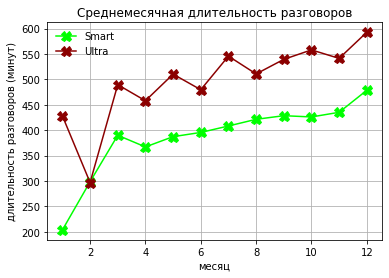

In [67]:
compare('Среднемесячная длительность разговоров',
        'длительность разговоров (минут)',
        'duration_total')

Наблюдаем следующие тенденции: 
- с января по декабрь для обоих тарифов наблюдался рост длительности разговора потребителей для обоих тарифов
- в каждом из месяцев длительность разговора потребителей на тарифе "Ультра" превышала аналогичный показатель на тарифе "Смарт". Исключение составляет только февраль. Но это значение по тарифу "Ультра" сильно выбивается (либо с исходными данными что-то не так, либо в этот месяц действительно меньше всего совершили звонков)
- аналогичная проблема наблюдается в тарифе "Смарт" в январе. 

<font color='purple'>Сообщения</font>

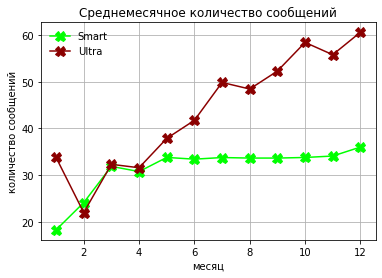

In [68]:
compare('Среднемесячное количество сообщений',
        'количество сообщений',
        'message_total')

Наблюдаем следующие тенденции:
- с января по апрель наблюдался рост количества сообщений у пользователей тарифа "Смарт", однако оставшиеся 8 месяцев сообщения держались на примерно одно уровне
- у тарифа "Ультра" наблюдался постоянный рост количества сообщений с февраля месяца. 
- если сравнивать тарифы между собой, в феврале количество сообщений на тарифе "Смарт" превышало показатель тарифа "Ультра", в марте-апреле они были практически равны, затем ситуация изменилась: количество сообщений по тарифу "Ультра" с каждым месяцем только увеличивало отрыв от количества сообщений тарифа "Смарт"

<font color='purple'>Интернет</font>

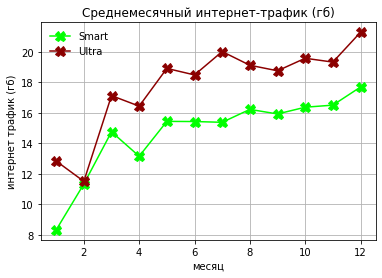

In [69]:
compare('Среднемесячный интернет-трафик (гб)',
        'интернет трафик (гб)',
        'gb_total')

По объему интернет-трафика можно наблюдать тенденции, аналогичные звонкам. И в очередной раз в феврале по тарифу "Ультра" происходит сильная просадка. Вероятно, это связано с исходными данными (нам могли не выслать полные данные)

<font color='purple'>Ежемесячная выручка</font>

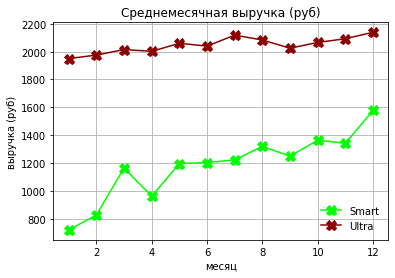

In [70]:
compare('Среднемесячная выручка (руб)',
        'выручка (руб)',
        'total_month')

Выручка по тарифу "Ультра" держится в диапазоне *1900-2200* рублей в год, чаще всего ближе к *2000*
А вот выручка по тарифу "Смарт" неизменно растет в течение года, занимая пиковое значение в декабре (как и по тарифу "Ультра"). Но все же можно сказать, что нормальным показателем для тарифа "Смарт" - значения, в пределах *1100-1300*, которые держатся *8* месяцев. 
Декабрь в который раз подтверждает мою теорию самого затратного месяца.

**<font color='blue'>Статистические показатели модели</font>**

Рассчитаем для каждого из тарифов статистические показатели: среднее, дисперсию и стандартное отклонение. 
Вместе с этим сразу расчитаем промежуток, в котором находится 99% значений по правилу трёх сигм.

In [71]:
def mvd(df, call, internet, message):
    df_mean = df.mean()
    df_variation = np.var(df, ddof=1)
    df_std_dev = np.std(df, ddof=1)
    display(df_mean, df_variation, df_std_dev)
    df_call_dur_min = max(0, df_mean[call] - 3 * df_std_dev[call])
    df_call_dur_max = df_mean[call] + 3 * df_std_dev[call]
    print('Длительность звонков для пользователей лежит в промежутке от {:.0f} до {:.0f} минут.'
        .format(df_call_dur_min, df_call_dur_max))
    df_gb_used_min = max(0, df_mean[internet] - 3 * df_std_dev[internet])
    df_gb_used_max = df_mean[internet] + 3 * df_std_dev[internet]
    print('Объём интернет-трафика лежит в промежутке от {:.0f} до {:.0f} гб.'
          .format(df_gb_used_min, df_gb_used_max))
    df_message_num_min = max(0, df_mean[message] - 3 * df_std_dev[message])
    df_message_num_max = df_mean[message] + 3 * df_std_dev[message]
    print('Количество отправленных сообщений лежит в промежутке от {:.0f} до {:.0f} .'
      .format(df_message_num_min, df_message_num_max))

<font color='blue'>Тариф "Смарт"</font>

In [72]:
mvd(smart_behavior, 'duration_total', 'gb_total', 'message_total')

user_id           1246.506505
month                8.346792
duration_total     417.934948
message_total       33.384029
gb_total            15.828503
total_month       1289.973531
dtype: float64

user_id            21350.907161
month                  8.528245
duration_total     36219.315784
message_total        796.812958
gb_total              32.865998
total_month       669785.708006
dtype: float64

user_id           146.119496
month               2.920316
duration_total    190.313730
message_total      28.227876
gb_total            5.732887
total_month       818.404367
dtype: float64

Длительность звонков для пользователей лежит в промежутке от 0 до 989 минут.
Объём интернет-трафика лежит в промежутке от 0 до 33 гб.
Количество отправленных сообщений лежит в промежутке от 0 до 118 .


<font color='blue'>Тариф "Ультра"</font>

In [73]:
mvd(ultra_behavior, 'duration_total', 'gb_total', 'message_total')

user_id           1263.094416
month                8.250761
duration_total     526.623350
message_total       49.363452
gb_total            19.012505
total_month       2070.152284
dtype: float64

user_id            19795.057133
month                  8.247014
duration_total    100873.633397
message_total       2285.266143
gb_total              97.037329
total_month       141516.745079
dtype: float64

user_id           140.694908
month               2.871762
duration_total    317.606098
message_total      47.804457
gb_total            9.850753
total_month       376.187114
dtype: float64

Длительность звонков для пользователей лежит в промежутке от 0 до 1479 минут.
Объём интернет-трафика лежит в промежутке от 0 до 49 гб.
Количество отправленных сообщений лежит в промежутке от 0 до 193 .


In [84]:
client_behavior.pivot_table(index='tariff',  
                 values=['duration_total', 'gb_total', 'message_total'], 
                 aggfunc=['mean', 'std', 'var']).T.style.format('{:.2f}')

Значения по обоим тарифам похожи, однако, в тарифе "Ультра" верхний погор заметно выше.
Построю сравнительные графики.

Поскольку данные по тарифам "Смарт" и "Ультра" являются непрерывными и имеют разную размерность, а выбор для них разного количества корзин при построении гистограммы может повлиять на результат, воспользуюсь для анализа *гистограммами плотности*.

In [74]:
def rplot(xlabel, text, column):
    plt.xlabel(xlabel)
    plt.ylabel('плотность распределения')
    plt.title('Сопоставление распределения '+text+' по тарифам')
    sns.kdeplot(smart_behavior[column], shade=True, label="Smart", color='lime')
    sns.kdeplot(ultra_behavior[column], shade=True, label="Ultra", color='DarkRed')
    plt.show()

<font color='blue'>Гистограмма плотности по звонкам</font>

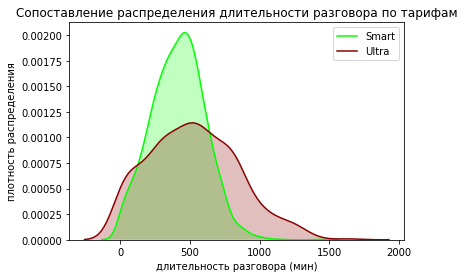

In [75]:
rplot('длительность разговора (мин)', 'длительности разговора', 'duration_total')

Распределения в разрезе тарифов по длительности разговора близки к нормальным. 
В тарифе "Ультра" больше интервал, в котором находятся основные значения. 
Распределение длительности разговора по тарифу "Смарт" не имеет явных скосов. А распределение длительности разговора по тарифу "Ультра" немного скошено вправо, то есть медианное значение ниже среднего. Это свидетельсвтует о том, что в тарифе "Ультра" присутствуют люди, которые использует тарифные минуты разговора свыше медианного значения.

<font color='blue'>Гистограмма плотности по объему интернет-трафика</font>

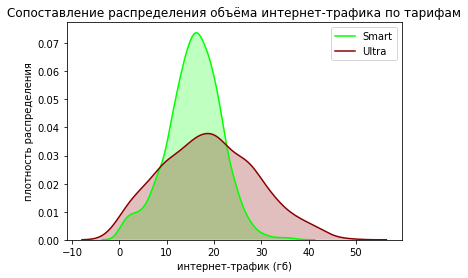

In [76]:
rplot('интернет-трафик (гб)', 'объёма интернет-трафика', 'gb_total')

Распределения объёма используемого интернет-трафика по тарифам "Смарт" и "Ультра" близки к нормальным и имеют практически идентичный вид. Оба датасета скошены влево. Таким образом, в тарифах есть люди, которые используют интернет-трафик меньше медианного значения.

<font color='blue'>Гистограмма плотности по объему сообщений</font>

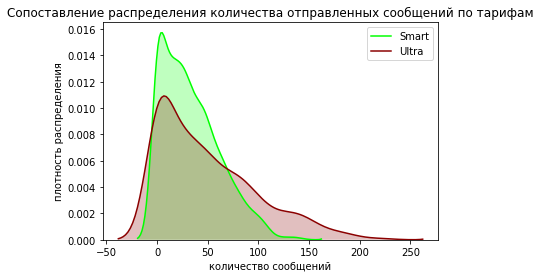

In [77]:
rplot('количество сообщений', 'количества отправленных сообщений', 'message_total')

Распределения количества отправленных сообщений по тарифам "Смарт" и "Ультра" близки к нормальным, но тариф "Ультра" имеет чуть больший разброс значений, чем тариф "Смарт". Датасеты по обоим тарифам скошены вправо, то есть медианное значение ниже среднего значения. Это говорит о том, что в обоих тарифах присутствуют люди, которые используют функцию сообщений больше медианного значения (в тарифе "Ультра" показатель выше, чем в тарифе "Смарт").

<font color='blue'>Гистограмма плотности по выручке за месяц</font>

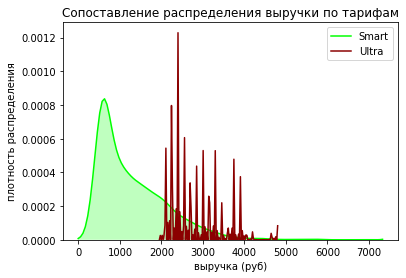

In [78]:
rplot('выручка (руб)', 'выручки', 'total_month')

Распределение выручки по тарифу "Смарт" близко к нормальному, но датасет скошен вправо, что свидетельствует о большом количестве пользователей тарифа, которые приносят компании выручку выше медианного значения.

Распределение выручки по тарифу "Ультра" выглядит иначе: пользователи приносят более высокую выручку компании, но у распределения очень много "выбросов": это говорит о том, что такая выручка не является постоянной и гарантированной, а именно - всё зависит от индивидуальных потребностей пользователя.

# <font style="background-color: lightblue; color=black">Проверка гипотез</font> #

**<font color='blue'>Гипотеза 1. Средняя выручка пользователей тарифов "Смарт" и "Ультра" различается</font>**

Я буду анализировать две генеральные совокупности: выручки пользователей тарифов "Ультра" (ultra_behavior) и "Смарт" (smart_behavior).

Сформулируем нулевую гипотезу H0: Средние двух генеральных совокупностей равны между собой.

Альтернативная гипотеза H1: Средние двух генеральных совокупностей не равны между собой.

Более точно мои генеральные совокупности можно назвать выборками, но согласно центральной предельной теореме - выборочные средние распределены нормально вокруг истинного среднего генеральной совокупности. 
Уровень значимости, определяющий близость к среднему значению: 5%

Кроме того, дисперсия каждой выборки должна быть оценена по датасету каждой из выборок, а не по их объединению. Также отметим, что выборки являются независимыми.

Проверим гипотезы через распределение t-Стьюдента.

In [79]:
sample_1 = ultra_behavior['total_month']
sample_2 = smart_behavior['total_month']

alpha = 0.05

results = st.ttest_ind(sample_1, sample_2, equal_var=False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу.


Нулевая гипотеза была отвергнута, следовательно, принимаем альтернативную гипотезу: средние двух генеральных совокупностей не равны между собой.

<font color='red'>Вывод:</font> cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

**<font color='blue'>Гипотеза 2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов</font>**

Создадим **2 выборки**, где одна будет с пользователями только из Москвы, другая - все остальные

In [80]:
moscow_client = client_behavior.loc[client_behavior['city'] == 'Москва']
other_client = client_behavior.loc[client_behavior['city'] != 'Москва']
display(moscow_client, other_client)

,user_id,month,duration_total,message_total,gb_total,city,tariff,total_month
8,1003,8.0,380.0,37.0,8.364463,Москва,ultra,1950
9,1003,9.0,961.0,91.0,12.176631,Москва,ultra,1950
10,1003,10.0,855.0,83.0,14.422012,Москва,ultra,1950
11,1003,11.0,824.0,94.0,11.090713,Москва,ultra,1950
12,1003,12.0,802.0,75.0,9.884307,Москва,ultra,1950
...,...,...,...,...,...,...,...,...
3169,1490,8.0,346.0,50.0,16.870479,Москва,smart,950
3170,1490,9.0,322.0,48.0,14.469678,Москва,smart,550
3171,1490,10.0,312.0,45.0,20.180635,Москва,smart,1750
3172,1490,11.0,282.0,47.0,18.274082,Москва,smart,1350


,user_id,month,duration_total,message_total,gb_total,city,tariff,total_month
0,1000,5.0,159.0,22.0,2.200674,Краснодар,ultra,1950
1,1000,6.0,172.0,60.0,22.689229,Краснодар,ultra,1950
2,1000,7.0,340.0,75.0,13.675430,Краснодар,ultra,1950
3,1000,8.0,408.0,81.0,13.726494,Краснодар,ultra,1950
4,1000,9.0,466.0,57.0,14.227451,Краснодар,ultra,1950
...,...,...,...,...,...,...,...,...
3209,1489,8.0,0.0,17.0,10.791562,Санкт-Петербург,smart,550
3210,1489,9.0,0.0,32.0,16.803027,Санкт-Петербург,smart,950
3211,1489,10.0,0.0,21.0,19.101016,Санкт-Петербург,smart,1550
3212,1489,11.0,0.0,20.0,17.081602,Санкт-Петербург,smart,1150


Воспользуюсь методом, как и при проверке первой гипотезы: проанализирую две генеральные совокупности:
выручка пользователей из Москвы и выручка пользователей из других регионов.

Нулевая гипотеза H0: Средние двух генеральных совокупностей равны между собой.

Альтернативная гипотеза H1: Средние двух генераальных совокупностей не равны между собой.

moscow_client и other_client - выборки из генеральных совокупностей. Для них также дейтсвует *центральная предельная теорема*.

Уровень значимости, определяющий близость к среднему значению - 5%

Кроме того, дисперсия каждой выборки должна быть оценена по отдельности по значениям в ней самой. Также отметим, что выборки являются независимыми.

Проверим гипотезы через распределение t-Стьюдента.

In [81]:
sample_1 = moscow_client['total_month']
sample_2 = other_client['total_month']

alpha = 0.05

results = st.ttest_ind(sample_1, sample_2, equal_var=False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

p-значение: 0.5257376663729298
Не получилось отвергнуть нулевую гипотезу.


Нулевая гипотеза не была отвергнута

<font color='red'>Вывод:</font> средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

**<font color='red'>Вывод</font>**

Основные данные (диапазоны) для каждого из тарифа по услугам за 2018 год по месяцам
- Тариф "Смарт":
                1. ежемесячная длительность разговоров в пределах от 0 минут до 1435 минут (45-50 минут в день) с медианным значением 422 минуты (около 14 минут в день)
                2. используемый интернет-трафик - от 0Гб до 38гб с медианным значением 17Гб
                3. отправленные сообщения - с 0 до 143 сообщений с медианным значением 28 сообщений
- Тариф "Ультра":
                1. ежемесячная длительность разговоров в диапазоне от 0 минут до 1673 минут (65-66 минут в день) с медианным значением 518 минут (около 17 минут в день)
                2. используемый интернет-трафик - от 0Гб до 49Гб с медианным значением 19Гб
                3. отправленные сообщения - с 0 до 224 сообщений с медианным значением 38 сообщений
    *Важно уточнить, что данные по тарифу "Ультра" за февраль выбиваются из общих данных. Вероятно, часть данных была утерена или не предоставлена, или предоставлена неправильно.*

С помощью отображения на графике динамики для обоих тарифов наблюдался рост и длительности разговора, и количества сообщений, и интернет-трафика в течение года по месяцам. Длительность разговора и интернет-трафика потребителей на тарифе "Ультра" превышала аналогичный показатель на тарифе "Смарт". В феврале количество сообщений на тарифе "Смарт" превышало показатель тарифа "Ультра", в марте-апреле они были практически равны, затем ситуация изменилась. Показатель тарифа "Смарт" прекратил рост на установившейся отметке, а показатель по тарифу "Ультра" продолжил расти и превзошёл тариф "Смарт".

Большинство значений длительности звонков для тарифа "Смарт" составило от 0 до 989 минут; а для тарифа "Ультра" - от 0 до 1479 минут. Большинство значений объёма использования интернет-трафика для тарифа "Смарт" составило от 0 до 34 гигабайт; а для тарифа "Ультра" - от 0 до 49 гигабайт. Это очень близкие значения. Большинство значений количества отправленных сообщений для тарифа "Смарт" составило от 0 до 118 сообщений; а для тарифа "Ультра" - от 0 до 193 сообщений.

Распределения в разрезе тарифов по всем параметрам (длительности разговоров, количеству сообщений, интернет-трафику) близки к нормальным. По объёму интернет трафика распределения по обоим тарифам имеют идентичный вид (но для тарифа "Ультра" данные расположены в более высоком интервале значений) со скошенностью влево. По количеству минут разговора в тарифе "Ультра" интервал шире, чем в тарифе "Смарт", и имеет скошенность вправо. А по количеству сообщений оба датасета скошены вправо. Это говорит нам о том, что в тарифе "Ультра" присутствуют люди, которые использует тарифные минуты разговора и отправляют сообщения свыше медианных значений; и те, кто использует интернет-трафик ниже медианного значения. В тарифе "Смарт" есть те, кто использует интернет-трафик ниже медианы; и люди, которые отправляют сообщения, свыше медианы.

Распределение выручки по тарифу "Смарт" близко к нормальному, но датасет скошен вправо, то есть существует большое количество пользователей тарифа, которые приносят компании выручку выше медианного значения. Распределение выручки по тарифу "Ультра" выглядит иначе. Пользователи приносят более высокую выручку компании, но у распределения очень много "выбросов": это говорит о том, что такая выручка не является постоянной и гарантированной - всё зависит от индивидуальных потребностей пользователя.

Были проведены t-тесты проверки двусторонних гипотез для двух независимых выборок. В результате данных тестов было выявлено, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается; а средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

# <font style="background-color: lightblue; color=black">Общий вывод</font> #

Мною было проведено исследование тарифов "Смарт" и "Ультра", которые предлагает компания «Мегалайн». Анализ был проведён на основе имеющихся исходных данных: о тарифах, о пользователях, о звонках, о сообщениях, об интернет-трафике. При проведение работы по предобработке данных, где я изменил типы данных, произвел расчет дополнительных показателей, исправил неточности, значительных ошибок выявлено не было. 
Подготовил данные по всем пользователям и их действиям, и собрал в одну таблицу все необходимые данные.

С самого начала бросилась в глаза тенденция, что пользователи выбирают *определенный вид услуг* из доступных по пакету (кто-то предпочитает звонки, кто-то пишет много сообщений, а кто-то использует только интернет-соединение). Эта теория подтвердилась тем фактом, что либеры по одним услугам, не являются лидерами по другим. 
Рассчитал ежемесячную выручку компании от каждого пользователя. Максимальный доход был получен в декабре и составил **6770** руб. Общая выручка составила **4,9 млн руб**.
Интересен также тот факт, что неизменным лидером по всем показателям был **декабрь**. Именно на этот месяц приходится большее количество пиковых значений по всем продуктам.

Большая часть значений по длительности звонков для тарифа "Смарт" составила от 0 до 989 минут; а для тарифа "Ультра" - от 0 до 1 479 минут. Что интересно, для тарифа "Смарт" этот разброс сильно пробивает установленный лимит в 500 минут; а для тарифа "Ультра" значение очень далеко от лимитных 3 000 минут.
Распределения в разрезе тарифов по длительности разговора близки к нормальным, причём в тарифе "Ультра" больше интервал, в котором находятся основные значения. Распределение длительности разговора по тарифу "Смарт" не имеет явных скосов, а распределение длительности разговора по тарифу "Ультра" немного скошено вправо. Это говорит о том, что в тарифе "Ультра" присутствуют люди, которые использует тарифные минуты разговора свыше медианного значения.

Большая часть значений объёма использования интернет-трафика для тарифа "Смарт" составила от 0 до 33 гигабайт; а для тарифа "Ультра" - от 0 до 49 гигабайт. При этом лимит для тарифа "Смарт" установлен порогом в 15 гигабайт, соответственно, многие пользователи вынуждены платить сверх абонентской платы; а для тарифа "Ультра" лимит установлен на уровне 30 гигабайт, поэтому пользователи также вынуждены платить за интернет дополнительно. Это подтверждается и распределением данных. Распределения объёма используемого интернет-трафика по тарифам "Смарт" и "Ультра" близки к нормальным и имеют практически идентичный вид. Оба датасета скошены влево. Таким образом, в тарифах есть люди, которые используют интернет-трафик меньше медианного значения, которое достаточно высоко.

Большая часть отправленных сообщений для тарифа "Смарт" составило от 0 до 118 сообщений; а для тарифа "Ультра" - от 0 до 193 сообщений. Лимитные значения по данному показателю следующие: в пакете "Смарт" это 50 сообщений; в пакете "Ультра" - 1000. Таким образом, пользователи тарифа "Смарт" вынуждены платить свыше абонентской платы, а пользователи тарифа "Ультра" не выходят за лимит. Распределения количества отправленных сообщений по тарифам "Смарт" и "Ультра" близки к нормальным, но тариф "Ультра" имеет чуть больший разброс значений, чем тариф "Смарт". Датасеты по обоим тарифам скошены вправо. Это говорит о том, что в обоих тарифах присутствуют люди, которые используют функцию сообщений больше медианного значения (в тарифе "Ультра" показатель выше, чем в тарифе "Смарт").

Для выручки в разрезе тарифов получили незначительно колеблющееся значение для тарифа "Ультра" на уровне около 2 000 рублей; и растущее значение для тарифа "Смарт" с небольшим падением в апреле. Однако значения по тарифу "Ультра" в несколько раз превосходит значения для тарифа "Смарт". Это связано с очень большим значением абонентской платы для тарифа "Ультра" с очень большими лимитами, в которые "укладывается" за месяц значительное число клиентов. Распределение выручки по тарифу "Смарт" близко к нормальному, но датасет скошен вправо, то есть существует большое количество пользователей тарифа, которые приносят компании выручку выше медианного значения. Распределение выручки по тарифу "Ультра" выглядит иначе. Пользователи приносят более высокую выручку компании, но у распределения очень много "выбросов": это говорит о том, что такая выручка не является постоянной и гарантированной - всё зависит от индивидуальных потребностей пользователя (в частности, от того, как он пользуется интернетом, так как это единственный параметр, который используется в тарифе сверхлимитно многими пользователями).

Дополнительно я провел t-тесты, в результате которых было выявлено, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается; а средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.